## GMM vs EDM 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import join
from tqdm import tqdm, trange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.utils import make_grid, save_image
sys.path.append("/n/home12/binxuwang/Github/mini_edm")
sys.path.append("/n/home12/binxuwang/Github/DiffusionMemorization")
from train_edm import edm_sampler, EDM, create_model
from core.edm_utils import get_default_config, create_edm

In [3]:
# set pandas display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### CIFAR10 EDM training process vs GMM scores

### Early phase ckpt stats

In [4]:
ckptdir = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps/base_cifar10_20240130-2317/checkpoints"
df_syn = pd.read_csv(join(ckptdir, "..", "edm_50k_epoch_gmm_exp_var.csv"))

In [7]:
df_syn.sigma.unique()

array([1.0e-02, 2.0e-02, 5.0e-02, 1.0e-01, 2.0e-01, 5.0e-01, 7.5e-01,
       1.0e+00, 1.5e+00, 2.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, 3.0e+01,
       4.0e+01, 8.0e+01])

In [ ]:
sns.lineplot(data=df_syn_sigma, x="epoch", y="St_residual", hue="name", 
             palette="RdYlBu", lw=2.0, ax=axs[i], ci="your_error_column")


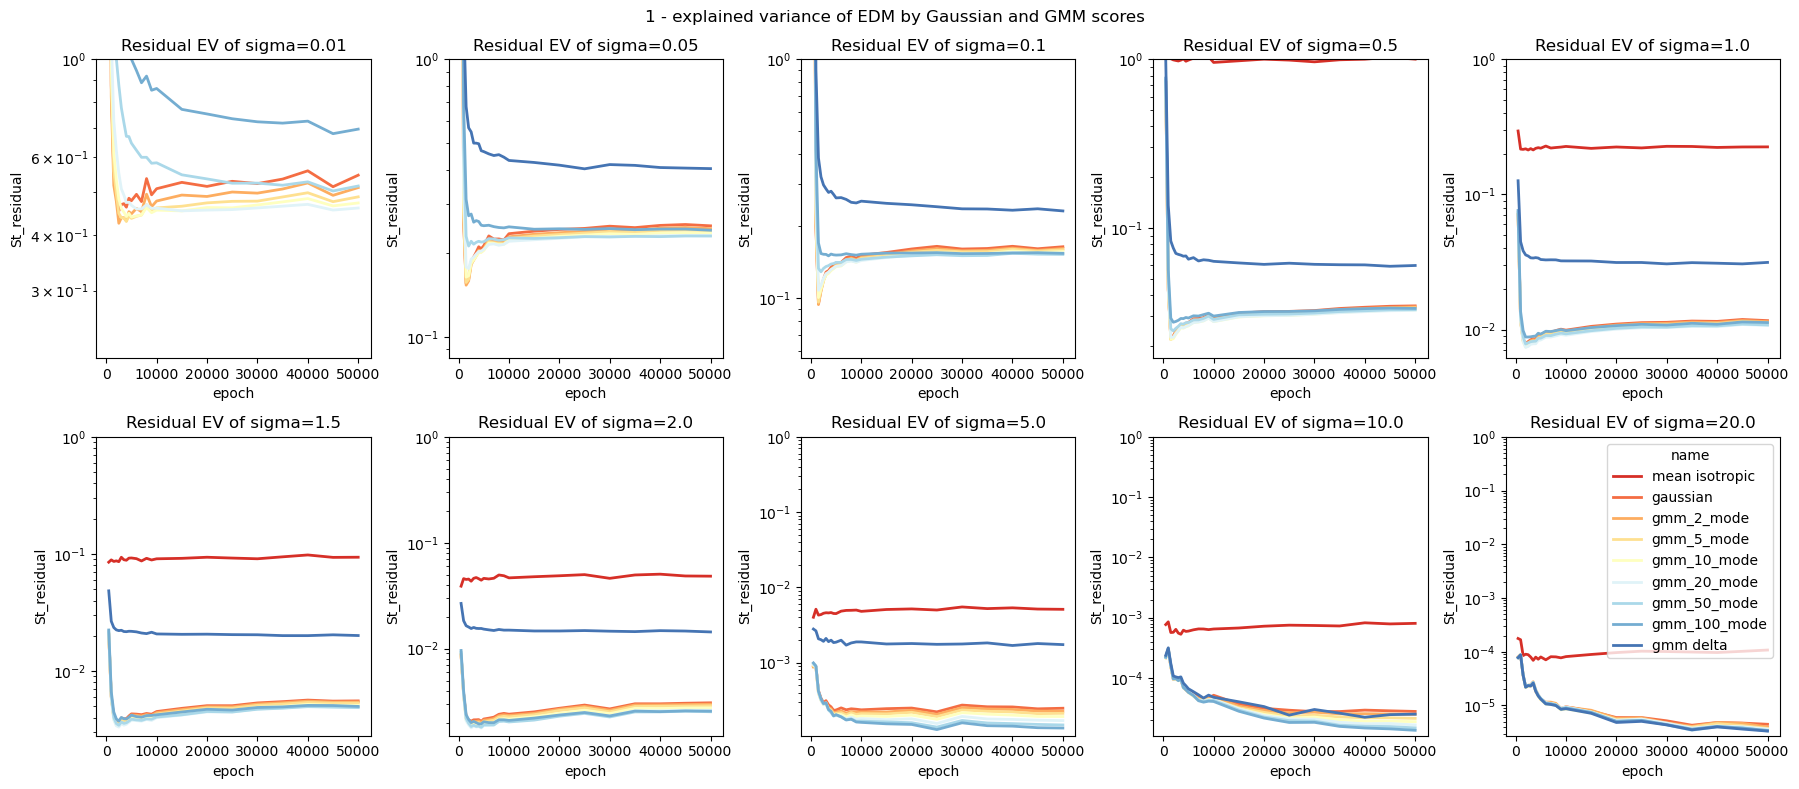

In [27]:
figh, axs = plt.subplots(2, 5, figsize=(18, 8))
axs = axs.flatten()
for i, sigma in enumerate([1.0e-02, 5.0e-02, 1.0e-01, 5.0e-01, 1.0e+00, 1.5e+00, 2.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, ]):
    df_syn_sigma = df_syn[(df_syn.sigma == sigma) & (df_syn.epoch > 0)]
    sns.lineplot(data=df_syn_sigma, x="epoch", y="St_residual", hue="name", 
                 hue_order=["mean isotropic", "gaussian", "gmm_2_mode", "gmm_5_mode", 
                       "gmm_10_mode", "gmm_20_mode", "gmm_50_mode", "gmm_100_mode", "gmm delta"],
                 palette="RdYlBu", lw=2.0, ax=axs[i])
    axs[i].set_yscale("log")
    axs[i].set_ylim(None, 1)
    axs[i].set_title(f"Residual EV of sigma={sigma}")
    if i < 9:
        axs[i].legend().remove()
    # else:
        # set position of legend to be right outside of the plot
        # axs[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.suptitle("1 - explained variance of EDM by Gaussian and GMM scores")
plt.tight_layout()
plt.show()

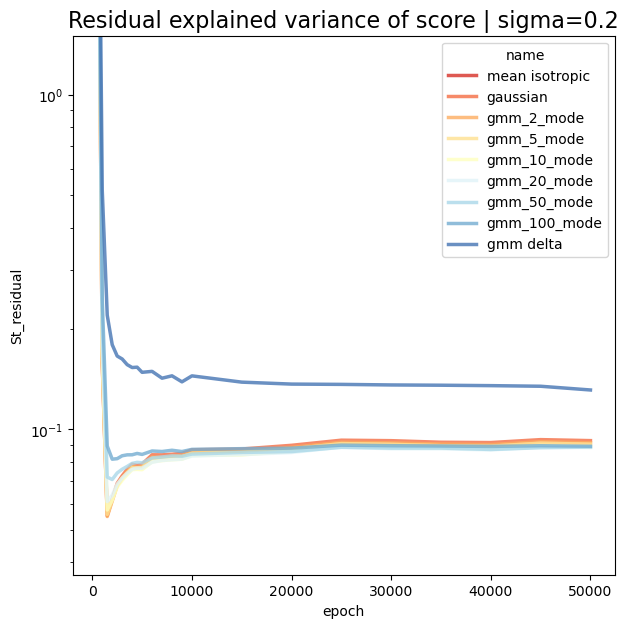

In [20]:
sigma = 0.2
plt.figure(figsize=(7, 7))
sns.lineplot(data=df_syn[(df_syn.sigma == sigma) & (df_syn.epoch > 0)], 
            x="epoch", y="St_residual", palette="RdYlBu", hue="name", lw=2.5, alpha=0.8,
            hue_order=["mean isotropic", "gaussian", "gmm_2_mode", "gmm_5_mode", 
                       "gmm_10_mode", "gmm_20_mode", "gmm_50_mode", "gmm_100_mode", "gmm delta"])
# TODO: add the shaded errorbar from `St_EV_std`
plt.yscale("log")
plt.ylim(None, 1.5)
plt.title(f"Residual explained variance of score | sigma={sigma}", fontsize=16)
plt.show()

### Late phase ckpt

In [21]:
ckptdir = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/mini_edm/exps/base_cifar10_20240130-2318/checkpoints"
df_syn_lt = pd.read_csv(join(ckptdir, "..", "edm_365k_epoch_gmm_exp_var.csv"))

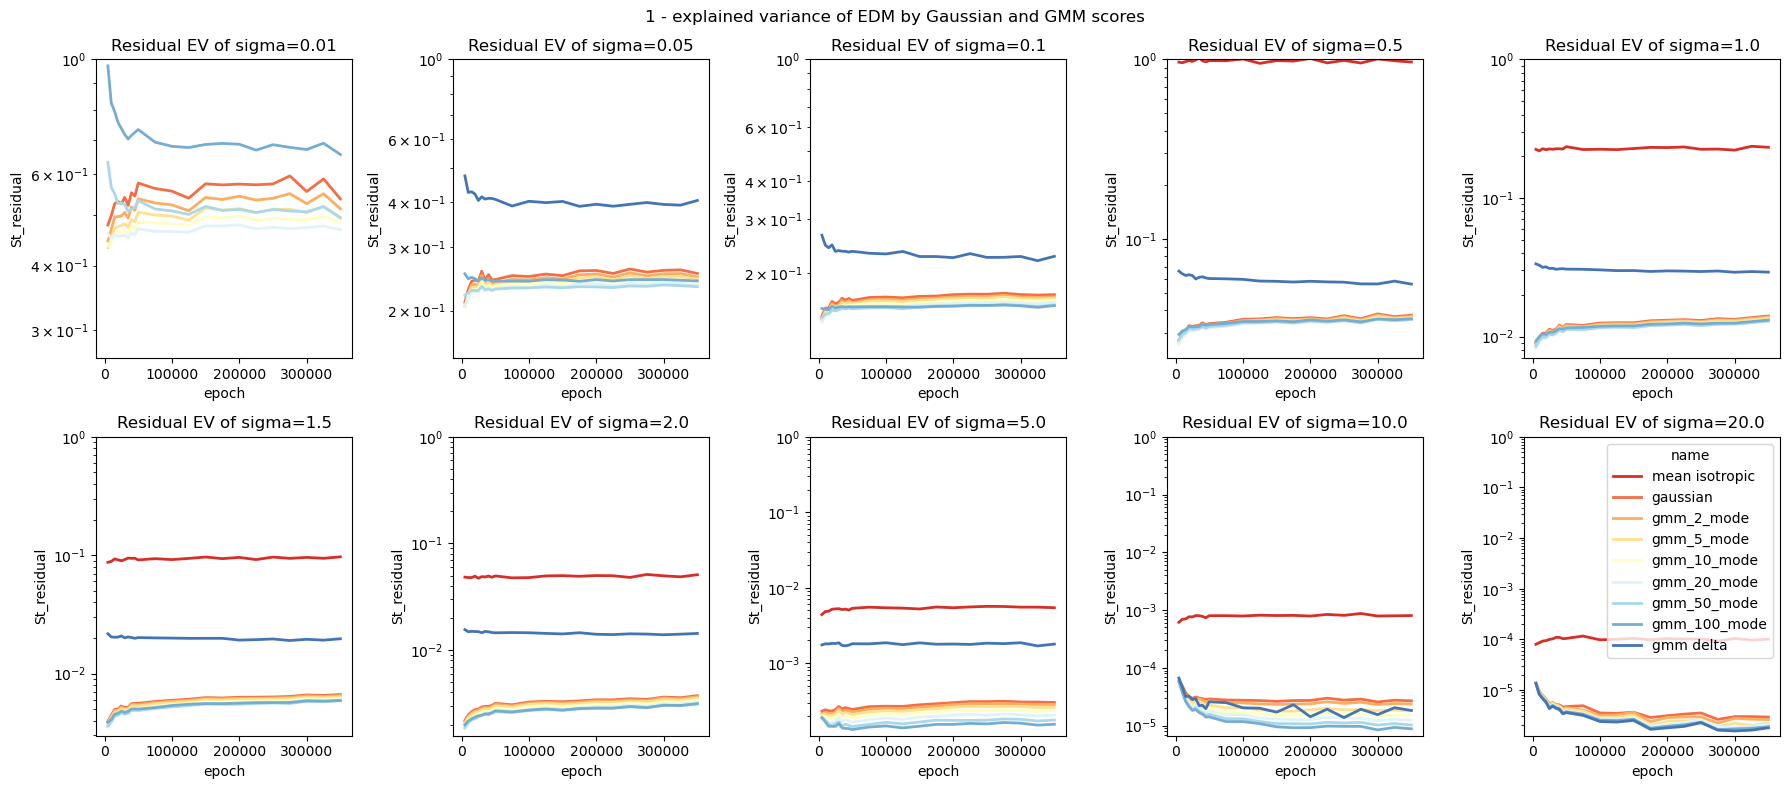

In [26]:
figh, axs = plt.subplots(2, 5, figsize=(18, 8))
axs = axs.flatten()
for i, sigma in enumerate([1.0e-02, 5.0e-02, 1.0e-01, 5.0e-01, 1.0e+00, 1.5e+00, 2.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, ]):
    df_syn_sigma = df_syn_lt[(df_syn_lt.sigma == sigma) & (df_syn_lt.epoch > 0)]
    sns.lineplot(data=df_syn_sigma, x="epoch", y="St_residual", hue="name", 
                 hue_order=["mean isotropic", "gaussian", "gmm_2_mode", "gmm_5_mode", 
                       "gmm_10_mode", "gmm_20_mode", "gmm_50_mode", "gmm_100_mode", "gmm delta"],
                 palette="RdYlBu", lw=2.0, ax=axs[i])
    axs[i].set_yscale("log")
    axs[i].set_ylim(None, 1)
    axs[i].set_title(f"Residual EV of sigma={sigma}")
    if i < 9:
        axs[i].legend().remove()
    # else:
        # set position of legend to be right outside of the plot
        # axs[i].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.suptitle("1 - explained variance of EDM by Gaussian and GMM scores (late training)")
plt.tight_layout()
plt.show()

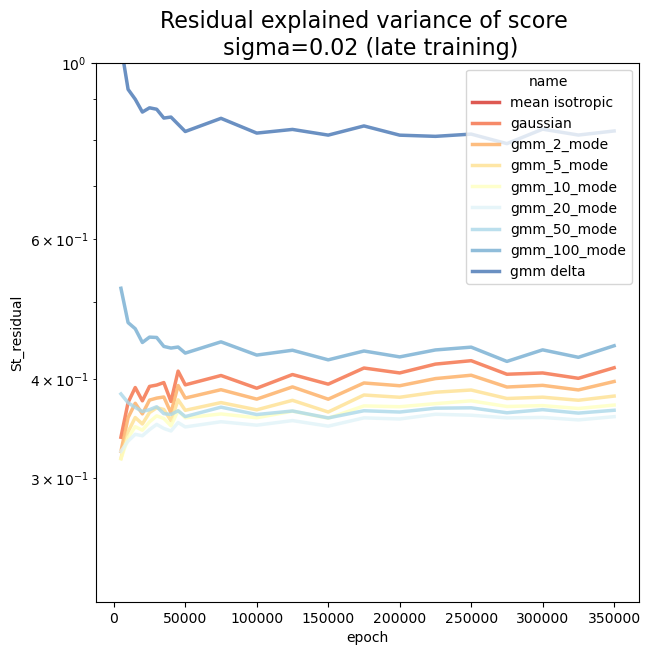

In [32]:
sigma = 0.02
plt.figure(figsize=(7, 7))
sns.lineplot(data=df_syn_lt[(df_syn_lt.sigma == sigma) & (df_syn_lt.epoch > 0)], 
            x="epoch", y="St_residual", palette="RdYlBu", hue="name", lw=2.5, alpha=0.8,
            hue_order=["mean isotropic", "gaussian", "gmm_2_mode", "gmm_5_mode", 
                       "gmm_10_mode", "gmm_20_mode", "gmm_50_mode", "gmm_100_mode", "gmm delta"])
# TODO: add the shaded errorbar from `St_EV_std`
plt.yscale("log")
plt.ylim(None, 1.0)
plt.title(f"Residual explained variance of score \n sigma={sigma} (late training)", fontsize=16)
plt.show()

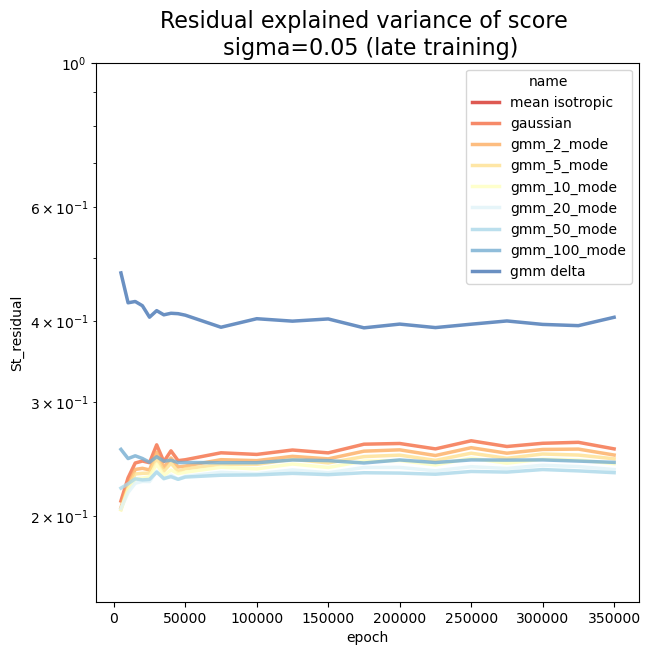

In [33]:
sigma = 0.05
plt.figure(figsize=(7, 7))
sns.lineplot(data=df_syn_lt[(df_syn_lt.sigma == sigma) & (df_syn_lt.epoch > 0)], 
            x="epoch", y="St_residual", palette="RdYlBu", hue="name", lw=2.5, alpha=0.8,
            hue_order=["mean isotropic", "gaussian", "gmm_2_mode", "gmm_5_mode", 
                       "gmm_10_mode", "gmm_20_mode", "gmm_50_mode", "gmm_100_mode", "gmm delta"])
# TODO: add the shaded errorbar from `St_EV_std`
plt.yscale("log")
plt.ylim(None, 1.0)
plt.title(f"Residual explained variance of score \n sigma={sigma} (late training)", fontsize=16)
plt.show()

### MNIST EDM training process vs GMM scores